# Daniel O'Brien
# DSC 478
# Assignment 2
### Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading in and formatting the training and testing sets can be seen below

In [2]:
#reading in the files
testData = np.loadtxt('testMatrixModified.txt')
testData

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
testData.shape

(5500, 200)

In [4]:
trainData = np.loadtxt('trainMatrixModified.txt')
trainData

array([[2., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
trainData.shape

(5500, 800)

In [6]:
TargetTrain = np.loadtxt('trainClasses.txt')
TargetTrain.shape

(800, 2)

In [7]:
TargetTrainLabel = TargetTrain[:, -1]
TargetTrainLabel

array([0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1.

In [8]:
TargetTest = np.loadtxt('testClasses.txt')
TargetTest.shape

(200, 2)

In [9]:
termFreqsTest = testData.sum(axis=1)
termFreqsTest

array([24.,  0.,  1., ...,  1.,  1.,  1.])

In [10]:
termFreqsTrain = trainData.sum(axis=1)
termFreqsTrain

array([102.,  11.,  22., ...,   2.,   2.,   2.])

In [11]:
#Transpose Training matrix so that the rows represent documents and columns represent the terms
TrainD = trainData.T
TrainD

array([[2., 2., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
TrainD.shape

(800, 5500)

In [13]:
TestD = testData.T
TestD.shape

(200, 5500)

In [14]:
words = open('modifiedterms.txt', 'r')
wordList = []
for line in words:
    line = words.readline()
    wordList.append(line)
print(wordList)

['rex\n', 'subject\n', 'librari\n', 'widget\n', 'time\n', 'ago\n', 'question\n', 'function\n', 'app\n', 'xtappiniti\n', 'have\n', 'littl\n', 'program\n', 'model\n', 'actual\n', 'mean\n', 'lib\n', 'thing\n', 'old\n', 'static\n', 'demo\n', 'repres\n', 'includ\n', 'xlibh\n', 'xmh\n', 'void\n', 'top\n', 'member\n', 'class\n', 'displai\n', 'null\n', 'xtvacreatemanagedwidget\n', 'xtrealizewidget\n', 'return\n', 'button\n', 'xevent\n', 'xtdispatchev\n', 'outsid\n', 'link\n', 'printf\n', 'screen\n', 'awai\n', 'unusu\n', 'see\n', 'miss\n', 'pleas\n', 'email\n', 'univers\n', 'boulder\n', 'angelo\n', 'rp16\n', 'cheap\n', 'watch\n', 'team\n', 'realli\n', 'increas\n', 'goaltend\n', 'get\n', 'night\n', 'scott\n', 'head\n', 'start\n', 'got\n', 'minut\n', 'kick\n', 'mclean\n', 'automat\n', '10\n', 'suspens\n', 'glenn\n', 'chest\n', 'mind\n', 'good\n', 'rememb\n', 'oh\n', 'fun\n', 'symasussexacuk\n', 'wm\n', 'look\n', 'suggest\n', 'x11r5\n', 'twm\n', 'grab\n', 'run\n', 'decwindow\n', 'told\n', 'r5\n', 

### Nearest Neighbor search function
#### This is going to read in our training data (D), the number of neighbors (K), the type of measure (0 for Euclidean and 1 for Cosine) as well as the vector that we are finding neighbors for (x)

#### The following computations were used for testing the functions. The Nearest Neighbor Classifier is located further down.

In [15]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

### Testing the search function with the first row of the testing data
#### For the first row, we can see that documents, 685, 628, 667, 152 and 427 are considered the be the closest using the cosine distance, with the respective distances that follow after. 
#### For the first row, we can see that documents 685, 628, 703, 266, and 510 are considered the closest using Euclidean distance

In [16]:
x = TestD[0]

In [17]:
# Finding the k=5 nearest neighbors using inverse of Cosine similarity as a distance metric
#x represents an array that will be tested.
neigh_idx, distances = knn_search(x, TrainD, 5, 1)

In [18]:
print(neigh_idx, distances)    

[685 628 667 152 427] [0.92709494 0.79673989 0.9320382  0.89790716 0.94654139 0.75100253
 0.87022016 0.83936495 0.8663802  0.83658124 0.85889206 0.91046232
 0.967053   0.8674656  0.85682474 0.84202209 0.9559169  0.95930309
 0.81201636 0.97654623 0.9759507  0.82749758 0.93546895 0.94852203
 0.89320834 0.9601543  0.97054574 0.9028059  0.86947952 0.92402623
 0.86401406 0.9456762  0.82902992 0.76739778 0.86165711 0.96686511
 0.86091087 0.9020568  0.9759507  0.95663844 0.97550939 0.92957962
 0.88366959 0.95588511 0.98953954 0.95998862 0.93637152 0.89704406
 0.95616007 0.9879854  0.9022188  0.93387535 0.84695651 0.93428479
 0.97550939 0.92957618 0.92167876 0.81023414 0.9721565  0.92547176
 0.96103567 0.90908324 0.94943321 0.84305278 0.93303296 0.87675215
 0.87719859 0.93699842 0.83269659 0.92941054 0.99204644 0.94604316
 0.93386442 0.88537336 0.91715181 0.8866087  0.95714143 0.82100941
 0.87927345 0.9552074  0.9611962  0.98981129 0.8936604  0.99198357
 0.81932434 0.93692886 0.91198579 0.9631

In [19]:
TrainD[neigh_idx]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### The following computations are used to test the classifier functionality. And they are used to rework the previous neighbor search function.

In [20]:
neigh_labels = TargetTrainLabel[neigh_idx]
print(neigh_labels)

[1. 1. 1. 1. 1.]


In [21]:
from collections import Counter
print(Counter(neigh_labels))

Counter({1.0: 5})


In [22]:
# Finding the k=5 nearest neighbors using inverse of Cosine similarity as a distance metric
#x represents an array that will be tested.
neigh_idx, distances = knn_search(x, TrainD, 5, 0)

In [23]:
print(neigh_idx, distances) 

[685 628 703 266 510] [ 30.28200786  17.3781472   17.32050808  16.4924225   16.91153453
  26.45751311  20.39607805  16.85229955  17.4642492   22.93468988
  18.97366596  20.22374842  46.62617291  20.78460969  16.91153453
  18.24828759  17.60681686  17.97220076  19.72308292  20.51828453
  16.46207763  20.0748599   16.43167673  17.02938637  18.68154169
  21.9544984   16.82260384  17.40689519  16.97056275  54.69917732
  18.52025918  19.77371993  16.09347694  24.63736999  18.38477631
  17.2626765   19.10497317  26.34387974  15.87450787 219.98863607
  16.43167673  20.59126028  17.80449381  30.98386677  16.79285562
  23.04343724  16.79285562  16.673332    24.0208243   45.01110974
  20.61552813  17.43559577  18.97366596  15.93737745  16.43167673
  16.52271164  27.94637722  18.43908891  16.97056275  19.5192213
  16.2788206   23.97915762  17.08800749  19.20937271  18.78829423
  18.22086716  21.04756518  18.13835715  19.72308292  15.87450787
  17.57839583  17.88854382  18.35755975  19.07878403  1

In [24]:
TrainD[neigh_idx]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
neigh_labels = TargetTrainLabel[neigh_idx]
print(neigh_labels)

[1. 1. 1. 1. 1.]


In [26]:
from collections import Counter
print(Counter(neigh_labels).most_common(1))

[(1.0, 5)]


# KNN Classifier

### The classifier below accepts a value to test (x), a training set (D), a number of neighbors (K), a type of measure (measure), and a set of corresponding training labels (TrainLabels). Using these inputs, the classifier is tested on the second row of the testing set and produces a value of 0, which indicates that the second row would fall into the Microsoft Windows class using 5 neighbors and the Euclidean Distance formula. When the classifier is run using 5 neighbors and the cosine distance formula, the same result is found.

In [27]:
def knn_Classify(x, D, K, measure, TrainLabels):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting 
    # return the indexes of K nearest neighbors
    neigh_idx = idx[:K]
    neigh_label = TrainLabels[neigh_idx]
    label = Counter(neigh_label).most_common(1)
    label = label[0][0]
    return label

In [28]:
x = TestD[1]

In [29]:
Label = knn_Classify(x, TrainD, 5, 0, TargetTrainLabel)

In [30]:
print(Label)

0.0


In [31]:
Label2 = knn_Classify(x, TrainD, 5, 1, TargetTrainLabel)
if Label2 == 0.0:
    print('Microsoft Windows')
else:
    print('Hockey')
Label2

Microsoft Windows


0.0

In [32]:
TargetTest[0][1]

1.0

In [33]:
if Label2 == TargetTest[0][0]:
    print('works')

works


# Part b

### This accuracy function runs each row of the test array through the KNN Classifier function. After returning the class label, the accuracy function tests to see if they match. If they do, a correct counter is increased by 1. Everytime the function runs, regardless of accuracy, a total counter is increaed by 1. At the end, a ratio is computed, the accurate classifications by the total classification. This ran with 97% accuracy, when using 5 neighbors and the cosine distance method.

In [34]:
def Accuracy(TestD, TargetTest, K, measure):
    errors = 0
    total = 0
    correct = 0
    for row in TestD:
        rowNum = total
        total += 1
        Label = knn_Classify(row, TrainD, K, measure, TargetTrainLabel)
        actual = TargetTest[rowNum][1]
        if Label == actual:
            correct += 1
        else:
            errors +=1
    accuracy = correct/total
    return accuracy
            
        
    

In [35]:
accuracy = Accuracy(TestD, TargetTest, 5, 1)
print(accuracy)

0.97


# Part c

In [36]:
CosineNeighbors = {}

In [37]:
n = 1
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy
CosineNeighbors

{1: 0.985}

In [38]:
n = 2
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [39]:
n = 3
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [40]:
n = 4
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [41]:
n = 5
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [42]:
n = 6
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [43]:
n = 7
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [44]:
n = 8
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [45]:
n = 9
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [46]:
n = 10
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [47]:
n = 11
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [48]:
n = 12
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [49]:
n = 13
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [50]:
n = 14
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [51]:
n = 15
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [52]:
n = 16
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [53]:
n = 17
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [54]:
n = 18
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [55]:
n = 19
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [56]:
n = 20
accuracy = Accuracy(TestD, TargetTest, n, 1)
CosineNeighbors[n] = accuracy

In [57]:
CosineNeighbors

{1: 0.985,
 2: 0.985,
 3: 0.97,
 4: 0.985,
 5: 0.97,
 6: 0.985,
 7: 0.98,
 8: 0.98,
 9: 0.975,
 10: 0.985,
 11: 0.98,
 12: 0.975,
 13: 0.98,
 14: 0.98,
 15: 0.985,
 16: 0.98,
 17: 0.975,
 18: 0.975,
 19: 0.975,
 20: 0.975}

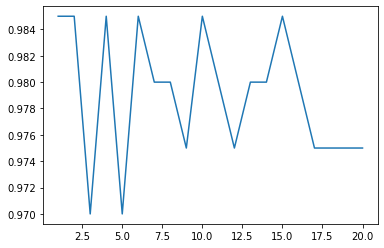

In [58]:
lists = sorted(CosineNeighbors.items())
x, y = zip(*lists)
plt.plot(x,y)
plt.show()

# Graph of Cosine Neighbors 1-20
### I attempted to create a function, that can be seen below to iterate through 1 to 20 neighbors, but I got an error I was unable to fix, so I just manually computed the 20 neighbors and graphed them onthe plot shown above. The results show that there is a little more consistency with neighbors less than 7.5. There is also high accuracy around 11 and 16 neighbors. 

In [59]:
def cosineMethod(n):
    Neighbors = {}
    for i in range(n):
        accurate = Accuracy(TestD, TargetTest, i, 1)
        Neighbors[i] = accurate
    return Neighbors

# Euclidean distance with Neighbors 1-20

In [60]:
EuclidNeighbors = {}
n = 1
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy
EuclidNeighbors

{1: 0.78}

In [61]:
n = 2
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy
EuclidNeighbors

{1: 0.78, 2: 0.78}

In [62]:
n = 3
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [63]:
n = 4
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [64]:
n = 5
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [65]:
n = 6
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [66]:
n = 7
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [67]:
n = 8
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [68]:
n = 9
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [69]:
n = 10
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [70]:
n = 11
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [71]:
n = 12
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [72]:
n = 13
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [73]:
n = 14
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [74]:
n = 15
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [75]:
n = 16
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [76]:
n = 17
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [77]:
n = 18
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [78]:
n = 19
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [79]:
n = 20
accuracy = Accuracy(TestD, TargetTest, n, 0)
EuclidNeighbors[n] = accuracy

In [80]:
EuclidNeighbors

{1: 0.78,
 2: 0.78,
 3: 0.81,
 4: 0.81,
 5: 0.815,
 6: 0.835,
 7: 0.765,
 8: 0.8,
 9: 0.75,
 10: 0.85,
 11: 0.795,
 12: 0.845,
 13: 0.775,
 14: 0.815,
 15: 0.785,
 16: 0.8,
 17: 0.76,
 18: 0.785,
 19: 0.74,
 20: 0.765}

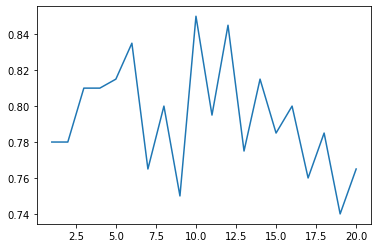

In [81]:
lists = sorted(EuclidNeighbors.items())
x, y = zip(*lists)
plt.plot(x,y)
plt.show()

## As can be seen above, there is less accuracy with Euclidean neighbors than cosine neighbors. The hgihest point of accuracy is around 85% eith about 11 neighbors. There is not a clear pattern where the strongest neighbors lie, but the highest result is between 10 and 13 neighbors with results trailing off on either side

# Part D

In [82]:
train = pd.read_table('trainMatrixModified.txt', header = None)
train_lab = pd.read_table('trainClasses.txt', header = None, index_col = 0)
test = pd.read_table('testMatrixModified.txt', header = None)
test_lab = pd.read_table('testClasses.txt', header = None, index_col = 0)
terms = pd.read_table('modifiedterms.txt', header = None)


In [83]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [84]:
T_train = train.T

In [85]:
T_train.shape

(800, 5500)

In [86]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
T_test = test.T
T_test.shape

(200, 5500)

In [88]:
train.shape

(5500, 800)

In [89]:
NDocs = train.shape[1]

In [90]:
Nterms = train.shape[0]

In [91]:
test.shape

(5500, 200)

In [92]:
DF = pd.DataFrame([(train!=0).sum(1)]).T
DF

,0
0,50
1,7
2,10
3,800
4,108
...,...
5495,3
5496,3
5497,2
5498,2


In [93]:
NMatrix = np.ones(np.shape(train), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)
NMatrix.shape

[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]


(5500, 800)

In [94]:
IDF = np.log2(np.divide(NMatrix, np.array(DF)))

In [95]:
print(IDF)
IDF.shape

[[4.   4.   4.   ... 4.   4.   4.  ]
 [6.84 6.84 6.84 ... 6.84 6.84 6.84]
 [6.32 6.32 6.32 ... 6.32 6.32 6.32]
 ...
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]]


(5500, 800)

In [96]:
TD_tfidf = train * IDF

In [97]:
pd.set_option("display.precision", 2)

TD_tfidf

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,8.00,0.00,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,13.67,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.51,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,12.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,23.11,2.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.78,0.0,0.0,0.0,0.0,0.0,0.0,2.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5496,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5497,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5498,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [98]:
x = test[0]
x

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
5495    0.0
5496    0.0
5497    0.0
5498    0.0
5499    0.0
Name: 0, Length: 5500, dtype: float64

In [99]:
x_tfidf = x * IDF.T[0] 
x_tfidf = np.array(x_tfidf)
print(x_tfidf)

[0. 0. 0. ... 0. 0. 0.]


In [100]:
DT_tfidf = TD_tfidf.T
DT_array = np.array(DT_tfidf)
DT_array.shape

(800, 5500)

In [101]:
neigh_idx, distances = knn_search(x_tfidf, DT_array, 5, 1)

In [102]:
distances = pd.Series(distances, index=DT_tfidf.index)
distances.sort_values()

685    0.49
628    0.62
152    0.82
194    0.82
731    0.83
       ... 
83     1.00
70     1.00
545    1.00
739    1.00
757    1.00
Length: 800, dtype: float64

In [103]:
print("Query:", x)
print("\nNeighbors:")
DT_tfidf.iloc[neigh_idx]

Query: 0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
5495    0.0
5496    0.0
5497    0.0
5498    0.0
5499    0.0
Name: 0, Length: 5500, dtype: float64

Neighbors:


,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
685,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,0.0,0.0,0.0,0.0,2.89,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
cat_labels = np.array(train_lab)
DT_tfidf["Category"] = cat_labels
DT_tfidf


,0,1,2,3,4,5,6,7,8,9,...,5491,5492,5493,5494,5495,5496,5497,5498,5499,Category
0,8.0,13.67,12.64,0.0,23.11,27.86,7.89,32.71,9.78,8.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.00,0.00,0.0,2.89,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,8.18,0.00,2.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,8.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,8.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
796,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
797,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
798,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [105]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

In [106]:
train_lab = np.array(train_lab)

In [107]:
neigh_idx, distances = knn_search(x_tfidf, DT_array, 5, 1)

In [108]:
train_lab[neigh_idx]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [109]:
neigh_idx, distances = knn_search(x_tfidf, DT_array, 5, 1)

In [110]:
label = TargetTrainLabel[neigh_idx]
label

array([1., 1., 1., 1., 1.])

In [111]:
label = Counter(label).most_common(1)
label = label[0][0]
label

1.0

In [112]:
def knn_Classify(x, D, K, measure, TrainLabels):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting 
    # return the indexes of K nearest neighbors
    neigh_idx = idx[:K]
    neigh_label = TrainLabels[neigh_idx]
    label = Counter(neigh_label).most_common(1)
    label = label[0][0]
    return label

In [113]:
label = knn_Classify(x_tfidf, DT_array, 5, 1, TargetTrainLabel)

In [114]:
label

1.0

In [115]:
def Accuracy(TestD, TargetTest, K, measure):
    errors = 0
    total = 0
    correct = 0
    for row in TestD:
        x_tfidf = row * IDF.T[0] 
        x_tfidf = np.array(x_tfidf)
        rowNum = total
        total += 1
        Label = knn_Classify(x_tfidf, DT_array, K, measure, TargetTrainLabel)
        actual = TargetTest[rowNum][1]
        if Label == actual:
            correct += 1
        else:
            errors +=1
    accuracy = correct/total
    return accuracy

In [116]:
accurate = Accuracy(test, TargetTest, 5, 1)
accurate

<ipython-input-112-6a0e66cca844>:11: RuntimeWarning: invalid value encountered in true_divide
  sims = np.dot(D,x)/(D_norm * x_norm)


0.505

## Cosine Accuracy 

#### According to my KNN Classification, this model appears to be less accurate than the first KNN Classification. There was not much variation in the level of accuracy, however, the degree of accuracy seemed to decrease as more neighbors were added. The peak was at 1-2 neighbors at just over 51%.

In [117]:
CosineAccuracy = {}
n = 1
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy
CosineAccuracy

{1: 0.51375}

In [118]:
n = 2
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy
CosineAccuracy

{1: 0.51375, 2: 0.51375}

In [119]:
n = 3
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [120]:
n = 4
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [121]:
n = 5
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [122]:
n = 6
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [123]:
n = 7
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [124]:
n = 8
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [125]:
n = 9
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [126]:
n = 10
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [127]:
n = 11
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [128]:
n = 12
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [129]:
n = 13
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [130]:
n = 14
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [131]:
n = 15
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [132]:
n = 16
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [133]:
n = 17
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [134]:
n = 18
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [135]:
n = 19
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [136]:
n = 20
accuracy = Accuracy(DT_array, T_test, n, 1)
CosineAccuracy[n] = accuracy

In [137]:
CosineAccuracy

{1: 0.51375,
 2: 0.51375,
 3: 0.50875,
 4: 0.51125,
 5: 0.5075,
 6: 0.51,
 7: 0.5075,
 8: 0.51,
 9: 0.5075,
 10: 0.5075,
 11: 0.505,
 12: 0.50875,
 13: 0.50625,
 14: 0.51,
 15: 0.5025,
 16: 0.5075,
 17: 0.505,
 18: 0.50875,
 19: 0.505,
 20: 0.5075}

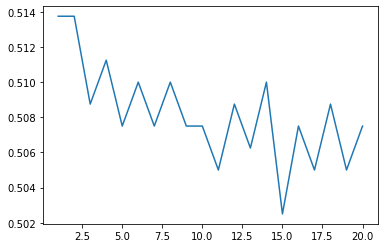

In [138]:
lists = sorted(CosineAccuracy.items())
x, y = zip(*lists)
plt.plot(x,y)
plt.show()

## Euclidean Accuracy

#### According to my classifier, this method also appears less accurate than the original method. The level of accuracy increases as we increase the number of neighbors, which is the opposite of what I saw with the Cosine distance classifier. The accuracy peaked with 17 neighbors at just over 55%.

In [139]:
EuclidAccuracy = {}
n = 1
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy
EuclidAccuracy

{1: 0.51375}

In [140]:
n = 2
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy
EuclidAccuracy

{1: 0.51375, 2: 0.51375}

In [141]:
n = 3
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy
EuclidAccuracy

{1: 0.51375, 2: 0.51375, 3: 0.51125}

In [142]:
n = 4
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [143]:
n = 5
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [144]:
n = 6
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [145]:
n = 7
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [146]:
n = 8
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [147]:
n = 9
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [148]:
n = 10
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [149]:
n = 11
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [150]:
n = 12
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [151]:
n = 13
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [152]:
n = 14
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [153]:
n = 15
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [154]:
n = 16
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [155]:
n = 17
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [156]:
n = 18
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [157]:
n = 19
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [158]:
n = 20
accuracy = Accuracy(DT_array, T_test, n, 0)
EuclidAccuracy[n] = accuracy

In [159]:
EuclidAccuracy

{1: 0.51375,
 2: 0.51375,
 3: 0.51125,
 4: 0.51375,
 5: 0.51,
 6: 0.515,
 7: 0.5175,
 8: 0.51875,
 9: 0.52625,
 10: 0.52625,
 11: 0.5325,
 12: 0.53125,
 13: 0.54,
 14: 0.535,
 15: 0.5425,
 16: 0.53625,
 17: 0.5525,
 18: 0.5425,
 19: 0.55,
 20: 0.54625}

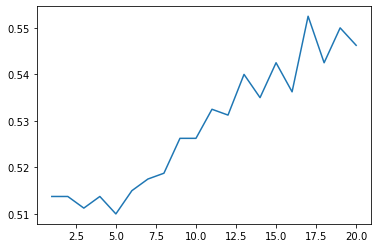

In [160]:
lists = sorted(EuclidAccuracy.items())
x, y = zip(*lists)
plt.plot(x,y)
plt.show()

# Part e

In [161]:
DT_array.shape

(800, 5500)

In [162]:
DT_tfidf


,0,1,2,3,4,5,6,7,8,9,...,5491,5492,5493,5494,5495,5496,5497,5498,5499,Category
0,8.0,13.67,12.64,0.0,23.11,27.86,7.89,32.71,9.78,8.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.00,0.00,0.0,2.89,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,8.18,0.00,2.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,8.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,8.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
796,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
797,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
798,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [163]:
CatZero = DT_tfidf[(DT_tfidf.Category==0)]
CatZero


,0,1,2,3,4,5,6,7,8,9,...,5491,5492,5493,5494,5495,5496,5497,5498,5499,Category
0,8.0,13.67,12.64,0.0,23.11,27.86,7.89,32.71,9.78,8.03,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0
2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,8.18,0.00,2.01,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0
4,8.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0
11,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0
12,0.0,0.00,0.00,0.0,0.00,0.00,3.94,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,0.0,0.00,0.00,0.0,0.00,4.64,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.0,8.06,0.0,0.0,0.0,0
785,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,8.06,0.0,0.00,0.0,0.0,0.0,0
790,0.0,0.00,0.00,0.0,0.00,0.00,7.89,8.18,0.00,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0
793,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0


In [164]:
CatOne = DT_tfidf[(DT_tfidf.Category==1)]
CatOne

,0,1,2,3,4,5,6,7,8,9,...,5491,5492,5493,5494,5495,5496,5497,5498,5499,Category
1,0.0,0.0,0.0,0.0,2.89,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,8.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,4.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
796,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
797,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
798,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [165]:
def groupedAvg(myArray, N=2):
    result = np.cumsum(myArray, 0)[N-1::N]/float(N)
    result[1:] = result[1:] - result[:-1]
    return result

In [166]:
resultZero = groupedAvg(CatZero, N=401)
resultZero

,0,1,2,3,4,5,6,7,8,9,...,5491,5492,5493,5494,5495,5496,5497,5498,5499,Category
795,0.57,0.07,0.08,0.0,1.13,0.97,0.97,2.67,0.66,0.63,...,0.0,0.02,0.04,0.06,0.04,0.06,0.02,0.04,0.04,0.0


In [167]:
resultOne = groupedAvg(CatOne, N=399)
resultOne

,0,1,2,3,4,5,6,7,8,9,...,5491,5492,5493,5494,5495,5496,5497,5498,5499,Category
799,0.45,0.12,0.27,0.0,0.47,0.0,0.09,0.0,0.01,0.97,...,0.04,0.0,0.0,0.0,0.02,0.0,0.02,0.0,0.0,1.0


In [168]:
ClassVectors = np.concatenate((resultZero, resultOne))
ClassVectors

array([[0.57, 0.07, 0.08, ..., 0.04, 0.04, 0.  ],
       [0.45, 0.12, 0.27, ..., 0.  , 0.  , 1.  ]])

In [169]:
Vectors = np.delete(ClassVectors, -1, 1)
Vectors


array([[0.57, 0.07, 0.08, ..., 0.02, 0.04, 0.04],
       [0.45, 0.12, 0.27, ..., 0.02, 0.  , 0.  ]])

In [170]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    neigh_idx = idx[:K]
    Class = neigh_idx[0]
    dist1 = dists[0]
    dist2 = dists[1]
    return Class, dist1, dist2

In [171]:
x = test[0]
x_tfidf = x * IDF.T[0] 
x_tfidf = np.array(x_tfidf)

In [172]:
Class, dist1, dist2 = knn_search(x_tfidf, Vectors, 1, 1)
print('The predicted Class is {}, the distance to Class 0 or microsft is {}, and the distance to Class 1 or Hockey is {}'.format(Class, dist1, dist2))

The predicted Class is 1, the distance to Class 0 or microsft is 0.9341110863934807, and the distance to Class 1 or Hockey is 0.7573582544838914


In [173]:
def Accuracy(TestD, TargetTest, K, measure):
    errors = 0
    total = 0
    correct = 0
    for row in TestD:
        x_tfidf = row * IDF.T[0] 
        x_tfidf = np.array(x_tfidf)
        rowNum = total
        total += 1
        Class, dist1, dist2 = knn_search(x_tfidf, Vectors, K, measure)
        actual = TargetTest[rowNum][1]
        if Class == actual:
            correct += 1
        else:
            errors +=1
    accuracy = correct/total
    return accuracy


In [174]:
accuracy = Accuracy(DT_array, T_test, 1, 1)
accuracy

0.51

### Accuracy analysis
#### The accuracy of this model is 51%. This is less accurate than the previous model according the Euclidean distance measure which saw a peak of about 55% and about the same level of accuracy according to the Cosine distance measure, which peaked around 51.4%. 